# Start up
Run the following cell to load the necessary functions

In [26]:

import pandas as pd
import numpy as np

def extractTimes(filename):
    distance = 4.68/2
    data = pd.read_csv('data/'+filename, header=None).drop(columns=[0]).T
    times=data.iloc[::2,0]
    positions = data.iloc[1::2].set_index(times)
    low = abs(positions+distance).idxmin()
    high = abs(positions-distance).idxmin()
    time = high-low
    return time

def extractData(filepre):
    import pandas as pd
    import os
    from scipy.stats import skew
    df = pd.DataFrame()

    for file in os.listdir("data"):
        if file.startswith(filepre):
            print(file)
            flow = file.replace(filepre,'').replace('.txt','').lstrip('_')            
            times = extractTimes(file)
            min = times.mode()[0]
            cleanTimes = times.where(times > min)
            mean = cleanTimes.mean()
            std = cleanTimes.std()
            skw = skew(cleanTimes.dropna())
            print(skw)
            df = pd.concat([df, pd.DataFrame([[flow, mean, min, std, skw ]])])
                
    df = df.rename(columns={0:'flow', 1:'mean', 2:'minimum', 3:'stdev', 4:'skewness' }).set_index('flow')
    df.index = pd.to_numeric(df.index, errors='coerce')
    return df.sort_index()

In [ ]:
file = '5mm_high_125.txt'
file.replace(filepre,'').replace('.txt','').lstrip('_')

In [11]:
times = extractTimes('5mm_high_75.txt')
from scipy.stats import skew

In [12]:
from scipy.stats import skew

In [25]:
skew(clean)

2.4939928792223873

<Axes: ylabel='Count'>

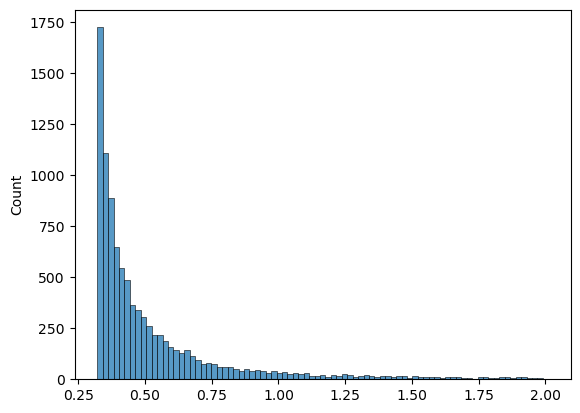

In [10]:
import seaborn as sns
sns.histplot(clean)

In [9]:

clean = times.where(times > times.mode()[0]).dropna()